In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import cell_model_python as model

In [2]:
# Initial states
y0 = model.init_state_values()
print(y0)

[ 0.000e+00  1.000e+00  0.000e+00  0.000e+00  7.500e-01  7.500e-01
  0.000e+00  1.000e+00  1.000e+00  1.000e+00  0.000e+00  1.000e+00
  2.000e-04  2.000e-01  1.160e+01 -8.620e+01  1.383e+02]


In [3]:
# Parameters
parameters = model.init_parameter_values()
print(parameters)

[3.00000000e-02 5.40500000e+00 9.60000000e-02 6.20000000e-02
 1.48380000e+01 2.90000000e-04 1.75000000e-04 5.92000000e-04
 2.94000000e-01 4.00000000e+01 1.00000000e+00 1.36200000e+00
 1.00000000e+03 1.00000000e-01 1.38000000e+00 8.75000000e+01
 2.50000000e+00 3.50000000e-01 5.00000000e-04 8.25000000e-01
 1.46000000e-02 1.50000000e-01 1.00000000e+01 2.00000000e+00
 1.00000000e-03 3.00000000e-01 2.50000000e-04 8.00000000e-05
 1.09400000e-03 4.25000000e-04 1.64640000e-02 2.50000000e-01
 8.23200000e-03 2.00000000e+00 1.40000000e+02 1.85000000e-01
 9.64853415e+04 8.31447200e+03 3.10000000e+02 1.64040000e-02
 5.20000000e+01 1.00000000e+00 1.00000000e+03 1.00000000e+01
 5.40000000e+00]


In [4]:
# Time steps
tsteps = np.arange(0, 500, 0.1)

# Solve ODE
y = odeint(model.rhs, y0, tsteps, args=(parameters,))

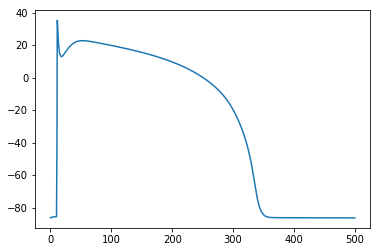

In [5]:
%matplotlib inline
# Extract the membrane potential
V_idx = model.state_indices('V')
V = y.T[V_idx]
plt.plot(tsteps, V)
plt.show()

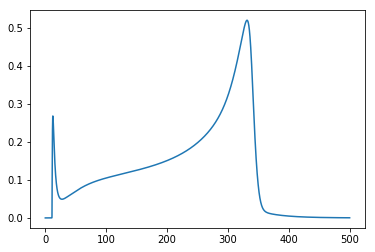

In [6]:
%matplotlib inline
# Extract monitored values
monitor = np.array([model.monitor(r, t, parameters) for
                    r, t in zip(y, tsteps)])
i_Kr_idx = model.monitor_indices('i_Kr')
i_Kr = monitor.T[i_Kr_idx]
plt.plot(tsteps, i_Kr)
plt.show()